# 데이터 분석 및 시각화
분석 데이터
- 유튜브 메인 페이지 “탐색/인기" 섹션에서 기초한 데이터셋
- 특정 기간동안의 동영상 트렌드 기록/연구 및 데이터를 다양한 관점으로 관찰하고
인사이트를 도출하는데 사용됨.
- 주어진 데이터셋은 유튜브에서 인기 동영상으로 선택된 비디오 기준으로 가공
하루에 한번씩 수집되었음
- 각각의 비디오가 인기 동영상에 처음 포착된 시점과 사라진 시점의 데이터가 기록
되어 있음


분석 및 시각화 코드
- 라이브러리 제한은 없지만 pandas는 필수 사용

제출 방식
- .py or .ipynb
- 결과를 도출하기 위해서 작성했던 전체 .py or .ipynb 코드와 모든 결과를 종합하
여 .zip 파일로 제출 (파일명 예시, junior_name_pretest.zip)

문제 (해당 과제에 대한 정답은 없습니다)

Q1. 데이터 타입별 시각화 (자유양식)
- 전체기간 카테고리->채널->비디오 개수
- 월별 카테고리->채널->비디오 개수
- 월별 TOP10 채널 (분류 기준은 비디오 개수)
- 주별 TOP5 채널 (분류 기준은 비디오 개수)
- 월별 카테고리별 태그 키워드 순위

Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표
들이 있음 ex) views, likes, dislikes, comments,...
- 비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

Q3. Q1, Q2의 답을 자유양식으로 작성 후 PDF로 변환하여 첨부
(영어로 작성 선호하지만 선택 사항임)

## Column
- video_id: 영상의 비디오 아이디
- channel_id: 영상이 업로드 되어있는 채널 아이디
- published_date: 영상이 유튜브에 업로드된 날짜
- category_name: 영상/채널의 카테고리
- duration: 영상의 길이 [PT1H13M35S==1시간 13분 25초]
- tags: 영상에 사용된 해시태그
- description: 영상부연설명
- on_trending_date:인기 동영상에서 처음 포착된 날짜
- off_trending_date: 인기 동영상에서 사라지기전 기록된 순위
- on_rank: 인기 동영상에서 처름 기록된 순위
- off_rank: 인기 동영상에서 사라지기전 기록된 순위
- on_views: 인기 동영상에서 처음 기록된 조회수
- off_views: 인기 동영상에서 사라지기전 기록된 조회수
- on_likes: 인기 동영상에서 처음 기록된 좋아요 수
- off_likes: 인기 동영상에서 사라지기전 기록된 조회수
- on_dislikes: 인기 동영상에서 처음 기록된 싫어요 수 
- off_dislikes: 인기 동영상에서 사라지기전 기록된 싫어요 수
- on_comments: 인기 동영상에서 처음 기록된 댓글수
- off_comments: 인기 동영상에서 사라지기전 기록된 댓글수
- on_channel_subscribers: 인기 동영상에서 처음기록된 구독자 수
- off_channel_subscribers: 인기 동영상에서 사라지기전 기록된 구독자 수
- on_channel_total_views: 인기 동영상에서 처음 기록된 전체 비디오 조회수의 합
- off_channel_total_views: 인기 동영상에서 사라지기전 기록된 전체 비디오 조회수의 합
- on_channel_total_videos: 인기 동영상에서 처음 기록된 채널의 비디오 갯수
- off_channel_total_videos: 인기 동영상에서 사라지기전 기록된 채널의 비디오 갯수

In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path=

import pandas as pd
import numpy as np
import datetime
import math
from IPython.display import display_html 

data=pd.read_csv(data_path,sep=',',engine='python')

In [ ]:
data.head()

In [ ]:
data.shape

(2644, 25)

In [ ]:
data.describe()

In [ ]:
data.isnull().sum().to_frame('nan_count')

,nan_count
video_id,0
channel_id,0
published_date,0
category_name,0
duration,0
tags,370
description,40
on_trending_date,0
off_trending_date,0
on_rank,0


In [ ]:
print("전체 채널의 수:", len(set(data["channel_id"])))

전체 채널의 수: 940


In [ ]:
# 날짜 계산
date_list = data["published_date"].tolist()
year_list=list()
month_list=list()
all_week_num=list()
all_month=list()

for date in date_list:
  y, m, d = map(int, date.split("-"))
  if y not in year_list:
    year_list.append(y)
  if m not in month_list:
    month_list.append(m)
  all_week_num.append(datetime.datetime(y,m,d).isocalendar()[1])
  all_month.append(m)

month_list = sorted(month_list)
# 영상이 생성된 정보
print("수집된 데이터의 년:", year_list)
print("수집된 데이터의 월:", month_list)

# 영상이 생성된 월 col 추가
data["published_month"]=all_month

# 영상이 생성된 주차 col 추가
data["week_num"]=all_week_num

수집된 데이터의 년: [2021]
수집된 데이터의 월: [3, 4, 5, 6, 7]


In [ ]:
category_list = list(set(data['category_name'].tolist()))

In [ ]:
data.head()

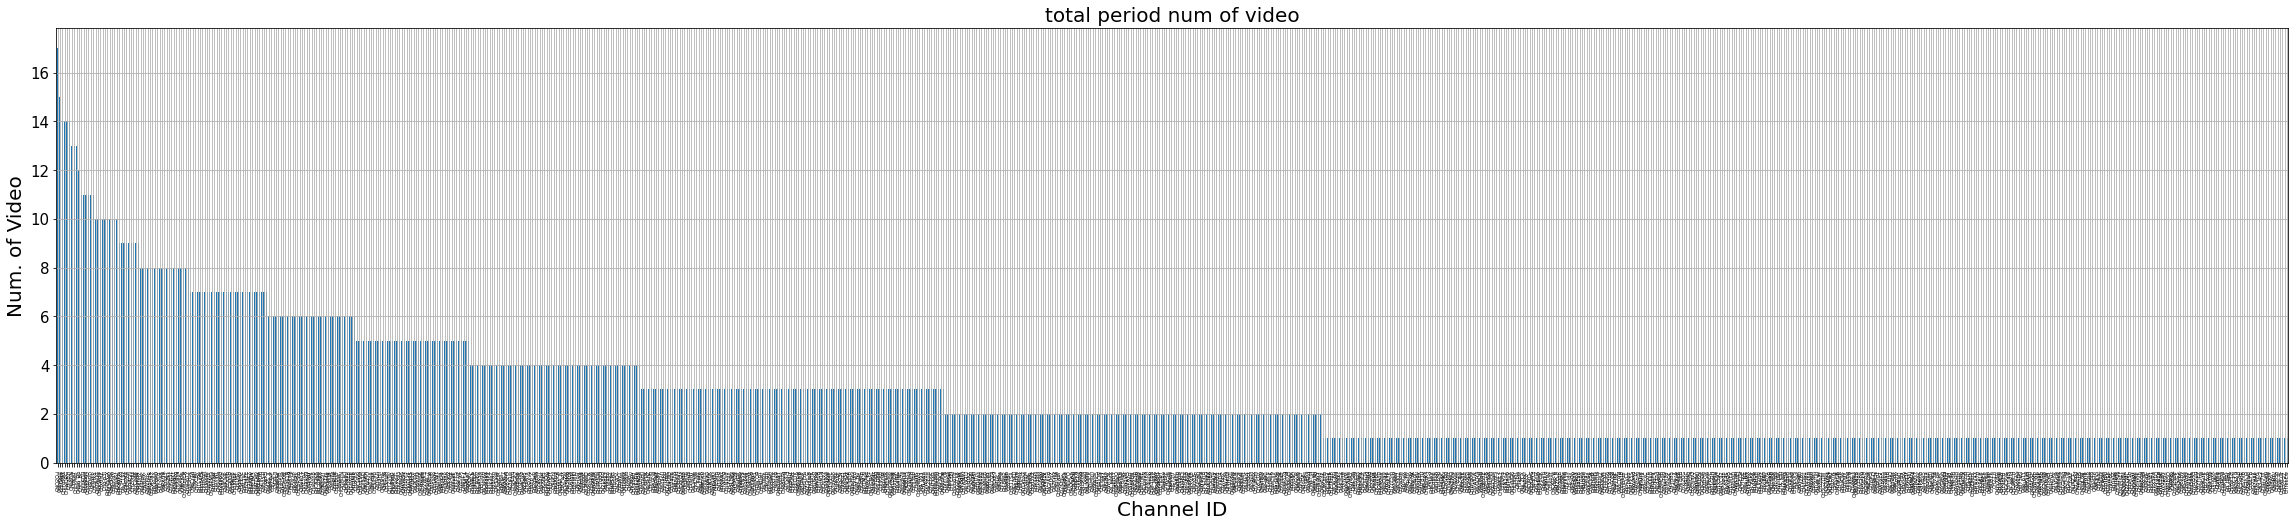

In [ ]:
# 전체기간 카테고리->채널->비디오 개수
# 이거 너무 많은 상위 10 또는 상위 %로 바꿔 출력할 것
count_chid = pd.value_counts(data['channel_id'].values, sort=True)
# count_chid.plot.barh()
# count_chid.plot.barh(grid=True, figsize=(8,40), fontsize=5)
count_chid.plot.bar()
count_chid.plot.bar(grid=True, figsize=(40,8), fontsize=5)
label = list(count_chid.keys())
index = np.arange(len(label))

plt.title('total period num of video', fontsize=20)
plt.xlabel('Channel ID', fontsize=20)
plt.ylabel('Num. of Video', fontsize=20)
plt.xticks(index, label, fontsize=5)
plt.yticks(fontsize=15)
plt.show()


전체 비디오의 수: 2644
상위 10개 채널의 비디오 갯수: 139
상위 10개 채널의 비디오 비율: 5.26%
         video_count
CHQ2O-i           17
CHtybqq           15
CHIG4gr           14
CHmzMtX           14
CHiwQRG           14
CHlzB2i           14
CHszFjh           13
CHtfriF           13
CHLkAep           13
CHtm_Qo           12


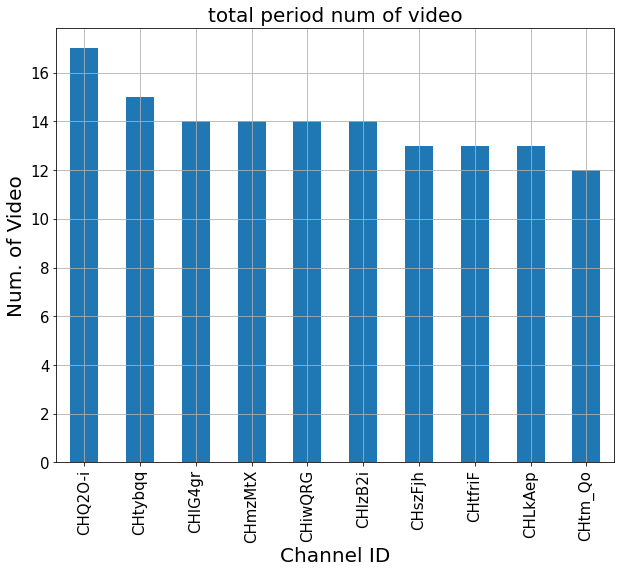

In [ ]:
# 상위 10개 채널의 비율
print("전체 비디오의 수:", sum(count_chid.values))
print("상위 10개 채널의 비디오 갯수:", sum(count_chid.values[:10]))
print("상위 10개 채널의 비디오 비율:", "%.2f%%" % (sum(count_chid.values[:10]) / sum(count_chid.values) * 100.0))

count_chid_top_10 = pd.value_counts(data['channel_id'].values, sort=True)[:10]

print(count_chid_top_10.to_frame(name='video_count'))

count_chid_top_10.plot.bar()
count_chid_top_10.plot.bar(grid=True, figsize=(10,8), fontsize=15)

label = list(count_chid_top_10.keys())
index = np.arange(len(label))

plt.title('total period num of video', fontsize=20)
plt.xlabel('Channel ID', fontsize=20)
plt.ylabel('Num. of Video', fontsize=20)
plt.xticks(index, label, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# 전체 비디오 상위 80, 90%의 채널의 수
sum_video=0
check_80=False
for ch_idx, ch_video_count in enumerate(count_chid.values):
  sum_video=sum_video+ch_video_count
  if (sum_video / sum(count_chid.values) * 100.0) > 80 and check_80==False:
    print("전체 비디오 상위 80%의 채널의 수: ", ch_idx, " (", ch_idx/len(set(data["channel_id"]))*100.0, ")", sep="")
    check_80=True
  if (sum_video / sum(count_chid.values) * 100.0) > 90:
    print("전체 비디오 상위 90%의 채널의 수: ", ch_idx, " (", ch_idx/len(set(data["channel_id"]))*100.0, ")", sep="")
    break

전체 비디오 상위 80%의 채널의 수: 472 (50.212765957446805)
전체 비디오 상위 90%의 채널의 수: 675 (71.80851063829788)


In [ ]:
# 테이블 나열을 위한 기능
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

# 월별 카테고리->채널->비디오 개수
total_monthly_result = list()
for m in month_list:
  print(m)
  df_stylers = list()
  filter_month = data['published_month']==m
  filter_month_result=data.loc[filter_month, ['channel_id', "category_name"]]
  for category in category_list:
    filter_cate = filter_month_result['category_name']==category
    filter_cate_result=filter_month_result.loc[filter_cate, ['channel_id']]

    rank_df = (pd.value_counts(filter_cate_result['channel_id'].values, sort=True))[:10].to_frame(name='video_count')
    df_stylers.append(rank_df.style.set_table_attributes("style='display:inline'").set_caption(category))
    # df_stylers.append(rank_df)

  display_html_input_0 = df_stylers[0]._repr_html_()+df_stylers[1]._repr_html_()+df_stylers[2]._repr_html_()+df_stylers[3]._repr_html_()+\
                       df_stylers[4]._repr_html_()+df_stylers[5]._repr_html_()+df_stylers[6]._repr_html_()+df_stylers[7]._repr_html_()
  display_html(display_html_input_0, raw=True)

  display_html_input_1 = df_stylers[8]._repr_html_()+df_stylers[9]._repr_html_()+df_stylers[10]._repr_html_()+df_stylers[11]._repr_html_()+\
                       df_stylers[12]._repr_html_()+df_stylers[13]._repr_html_()+df_stylers[14]._repr_html_()
  display_html(display_html_input_1, raw=True)
 
  print("\n\n\n")


3


,video_count
CHd4Fmc,1
CHWrh9h,1
,video_count
CHV3i3l,1
CHyCL5k,1
CHgBLs7,1
CHEUL40,1
,video_count
CHicKQU,2
CHvW8no,1


,video_count
CHG9aFJ,2
CHj3_t5,1
CHH3mJ-,1
CH_U34U,1
CHkinYT,1
CH9thBC,1
,video_count
,video_count
CHUkuuo,1
,video_count






4


,video_count
CHd4Fmc,3
CHIZ5rC,3
CHj8zZ1,2
CHp94pz,2
CHy2WX3,2
CHBTytr,2
CHKm-cu,1
CHLduRr,1
CH2gasv,1
CHVXx89,1


,video_count
CHMEbRp,4
CHIDOGT,3
CHPTy0B,3
CHcQTRi,2
CHAySce,2
CHhlgI3,2
CH-0C8y,2
CHsU-I-,2
CH1aS5C,2
CHF4Wxd,2






5


,video_count
CHn64fS,4
CHzIOIS,3
CH6LBdA,3
CHBTytr,3
CHy2WX3,2
CHpg89Y,2
CHKrhyP,2
CHVXx89,2
CHZCvbW,2
CHWrh9h,1


,video_count
CHsU-I-,6
CHhlgI3,4
CHHBvfB,4
CHF4Wxd,3
CHAySce,3
CHfq4V1,3
CHH3mJ-,3
CH8d0Zg,2
CHcQTRi,2
CHWlV3L,2






6


,video_count
CH2gasv,3
CHd4Fmc,2
CHWrh9h,2
CHIZ5rC,2
CHiNS0K,2
CHKrhyP,1
CHVXx89,1
CHxjZ0G,1
CHy2WX3,1
CHzIOIS,1


,video_count
CHcQTRi,2
CH_U34U,2
CHhlgI3,2
CHQabOR,2
CHkinYT,2
CHF4Wxd,2
CHAySce,1
CHKhcMX,1
CHWskYk,1
CHTHCOP,1






7


,video_count
CHKrhyP,3
CHVXx89,2
CHkxvX8,2
CHn64fS,2
CHL01un,2
CHyn7ao,2
CH8wHwv,2
CHd4Fmc,2
CH1g9Ja,1
CH5q0PI,1


,video_count
CHoxT1k,3
CHkinYT,3
CH-0C8y,3
CHsU-I-,3
CHj3_t5,2
CH0imOR,2
CHF4Wxd,2
CHMEbRp,2
CH_U34U,2
CHLKugl,1


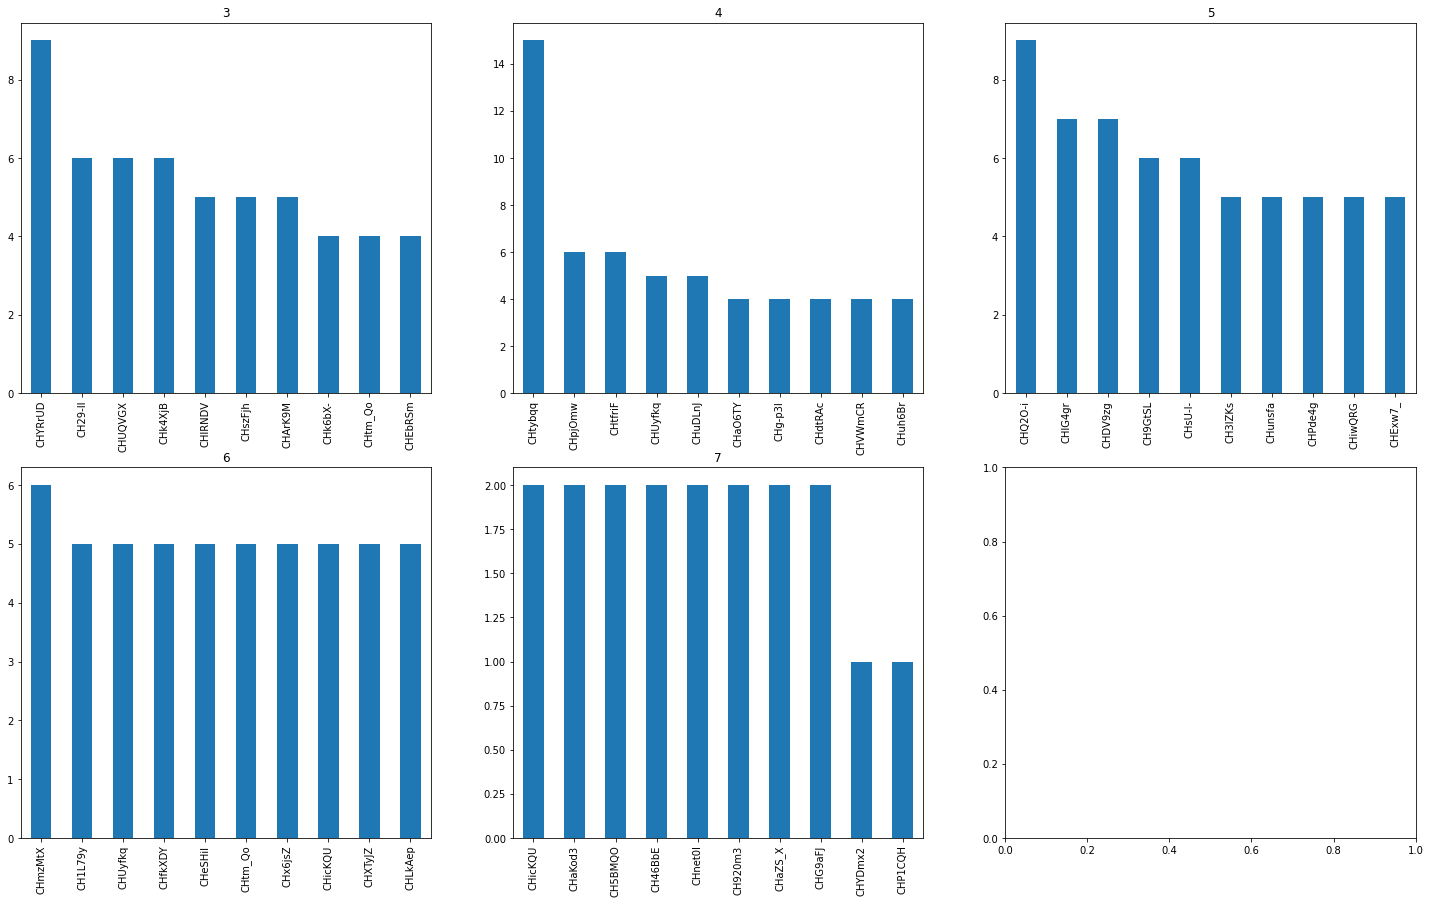

In [ ]:
# 월별 TOP10 채널 (분류 기준은 비디오 개수)
monthly_top10_chid_ber=list()
monthly_top10_chid_table=list()
for m in month_list:
  filter_comment = data['published_month']==m
  filtering_df=data.loc[filter_comment, ['channel_id']]

  top10_chid_df = pd.value_counts(filtering_df['channel_id'].values, sort=True)[:10]
  monthly_top10_chid_ber.append(top10_chid_df)
  monthly_top10_chid_table.append(list(top10_chid_df.keys()))

# 업로드한 비디오의 개수까지 bar chart로 출력
fig, axes = plt.subplots(figsize=(25,15),nrows=2, ncols=3)

monthly_top10_chid_ber[4].plot(ax=axes[0,0], kind='bar', title='3')
monthly_top10_chid_ber[3].plot(ax=axes[0,1], kind='bar', title='4')
monthly_top10_chid_ber[2].plot(ax=axes[0,2], kind='bar', title='5')
monthly_top10_chid_ber[1].plot(ax=axes[1,0], kind='bar', title='6')
monthly_top10_chid_ber[0].plot(ax=axes[1,1], kind='bar', title='7')

In [ ]:
# 순위 테이블로 출력
monthly_top10 = pd.DataFrame(np.array(monthly_top10_chid_table).T, index=list(range(1,11)), columns=month_list)
monthly_top10

,3,4,5,6,7
1,CHicKQU,CHmzMtX,CHQ2O-i,CHtybqq,CHYRrUD
2,CHaKod3,CH1L79y,CHIG4gr,CHpjOmw,CH29-Il
3,CH5BMQO,CHUyfkq,CHDV9zg,CHtfriF,CHUQVGX
4,CH46BbE,CHfkXDY,CH9GtSL,CHUyfkq,CHk4XjB
5,CHnet0I,CHeSHil,CHsU-I-,CHuDLnJ,CHlRNDV
6,CH920m3,CHtm_Qo,CH3IZKs,CHaO6TY,CHszFjh
7,CHaZS_X,CHx6jsZ,CHunsfa,CHg-p3l,CHArK9M
8,CHG9aFJ,CHicKQU,CHPde4g,CHdtRAc,CHk6bX-
9,CHYDmx2,CHXTyJZ,CHiwQRG,CHVWmCR,CHtm_Qo
10,CHP1CQH,CHLkAep,CHExw7_,CHuh6Br,CHEbRSm


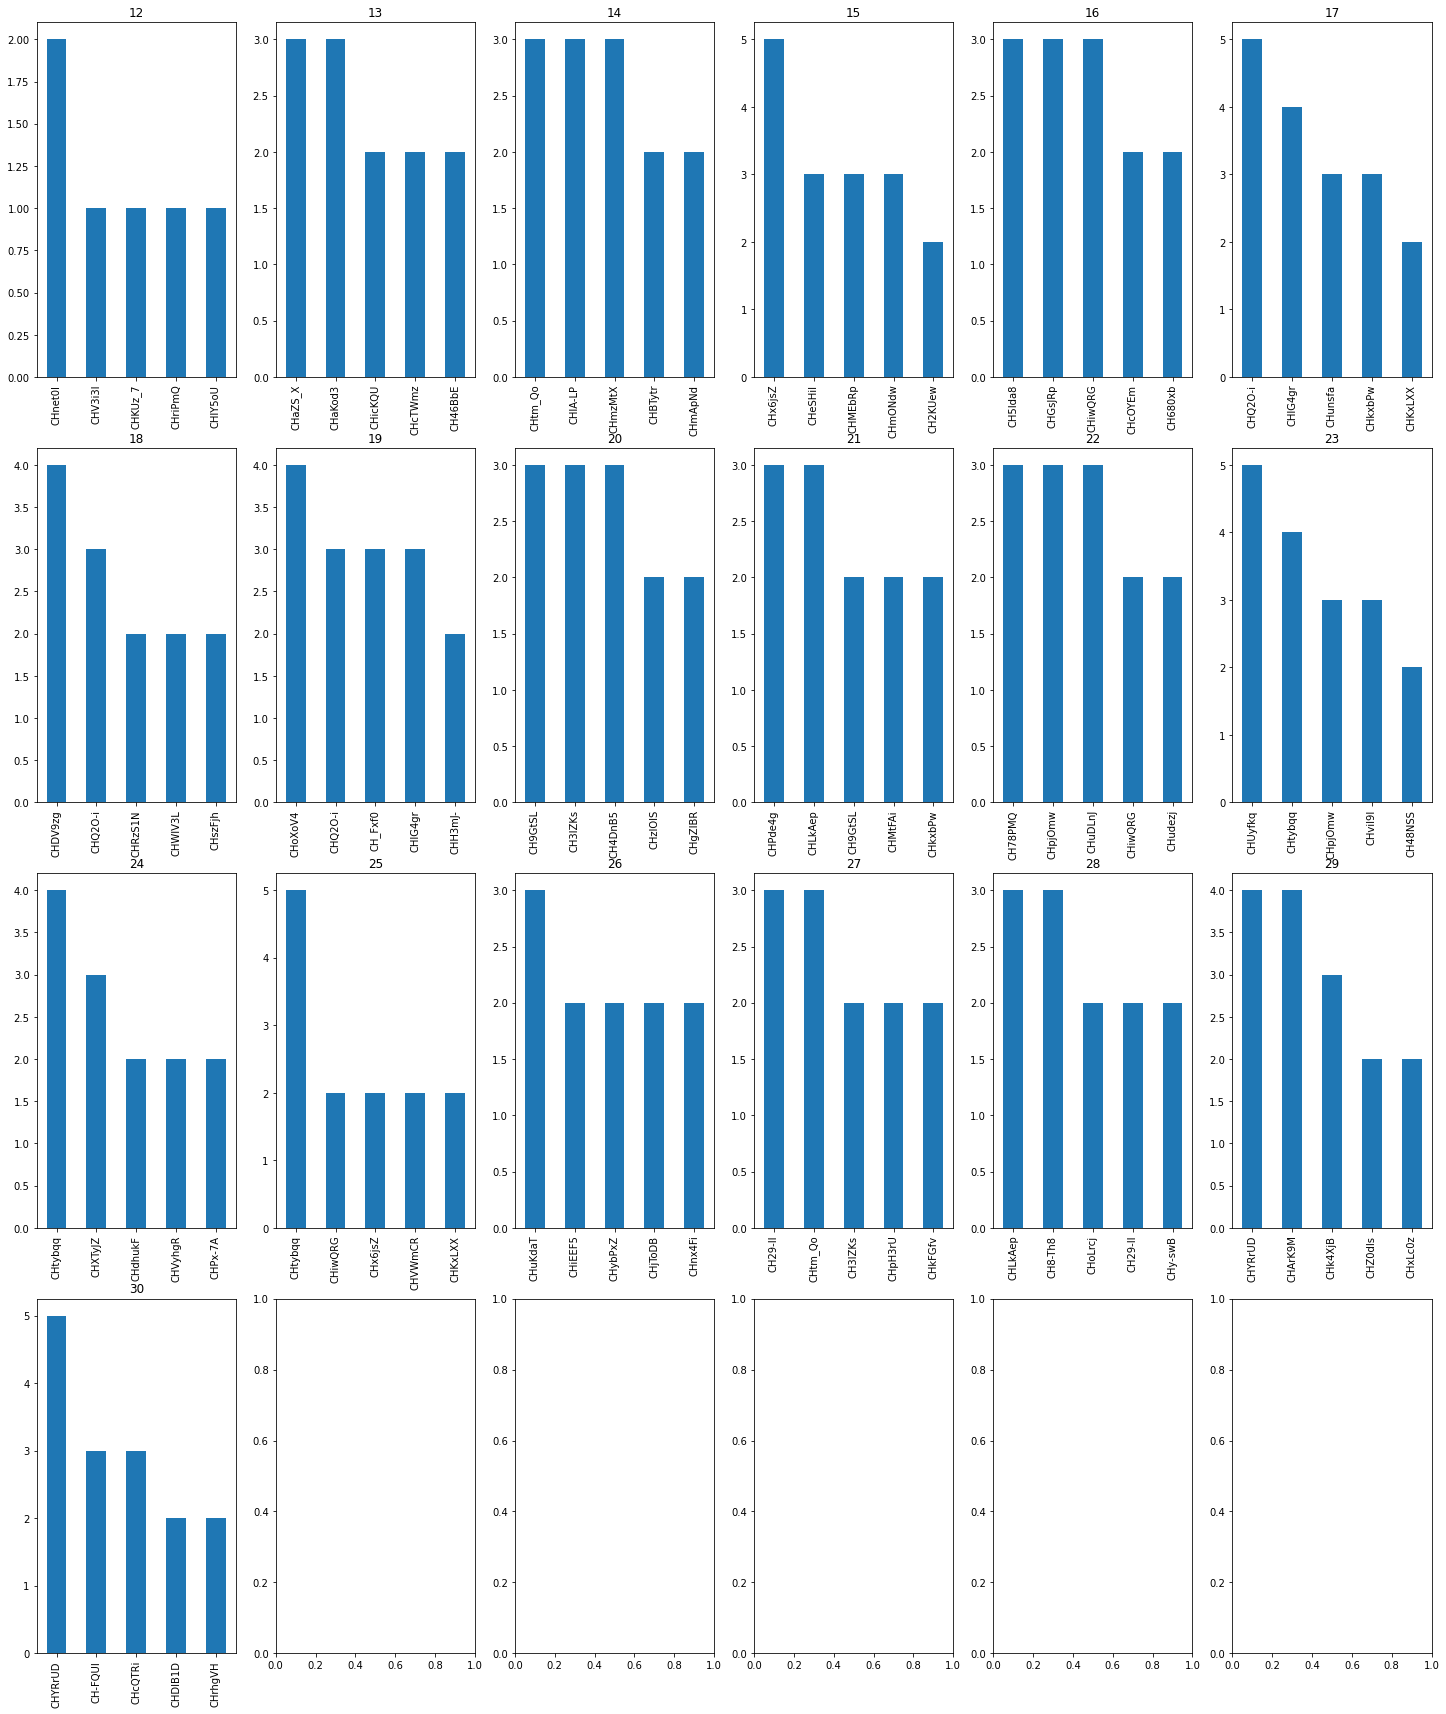

In [ ]:
# 각 주차별 top 5 계산

week_list = list(set(all_week_num))

weekly_top5_chid_bar=list()
weekly_top5_chid_table=list()
for w in week_list:
  filter_comment = data['week_num']==w
  filtering_df=data.loc[filter_comment, ['channel_id']]

  top5_chid_df= pd.value_counts(filtering_df['channel_id'].values, sort=True)[:5]
  weekly_top5_chid_bar.append(top5_chid_df)
  weekly_top5_chid_table.append(list(top5_chid_df.keys()))

fig, axes = plt.subplots(figsize=(25,30),nrows=4, ncols=6)

weekly_top5_chid_bar[0].plot(ax=axes[0,0], kind='bar', title='12')
weekly_top5_chid_bar[1].plot(ax=axes[0,1], kind='bar', title='13')
weekly_top5_chid_bar[2].plot(ax=axes[0,2], kind='bar', title='14')
weekly_top5_chid_bar[3].plot(ax=axes[0,3], kind='bar', title='15')
weekly_top5_chid_bar[4].plot(ax=axes[0,4], kind='bar', title='16')
weekly_top5_chid_bar[5].plot(ax=axes[0,5], kind='bar', title='17')
weekly_top5_chid_bar[6].plot(ax=axes[1,0], kind='bar', title='18')
weekly_top5_chid_bar[7].plot(ax=axes[1,1], kind='bar', title='19')
weekly_top5_chid_bar[8].plot(ax=axes[1,2], kind='bar', title='20')
weekly_top5_chid_bar[9].plot(ax=axes[1,3], kind='bar', title='21')
weekly_top5_chid_bar[10].plot(ax=axes[1,4], kind='bar', title='22')
weekly_top5_chid_bar[11].plot(ax=axes[1,5], kind='bar', title='23')
weekly_top5_chid_bar[12].plot(ax=axes[2,0], kind='bar', title='24')
weekly_top5_chid_bar[13].plot(ax=axes[2,1], kind='bar', title='25')
weekly_top5_chid_bar[14].plot(ax=axes[2,2], kind='bar', title='26')
weekly_top5_chid_bar[15].plot(ax=axes[2,3], kind='bar', title='27')
weekly_top5_chid_bar[16].plot(ax=axes[2,4], kind='bar', title='28')
weekly_top5_chid_bar[17].plot(ax=axes[2,5], kind='bar', title='29')
weekly_top5_chid_bar[18].plot(ax=axes[3,0], kind='bar', title='30')

In [ ]:
# 순위 테이블로 출력
weekly_top5 = pd.DataFrame(np.array(weekly_top5_chid_table).T, index=[ '1', '2', '3', "4", "5" ], columns=week_list)
weekly_top5

,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,CHnet0I,CHaZS_X,CHtm_Qo,CHx6jsZ,CH5Ida8,CHQ2O-i,CHDV9zg,CHoXoV4,CH9GtSL,CHPde4g,CH78PMQ,CHUyfkq,CHtybqq,CHtybqq,CHuKdaT,CH29-Il,CHLkAep,CHYRrUD,CHYRrUD
2,CHV3i3l,CHaKod3,CHIA-LP,CHeSHil,CHGsJRp,CHIG4gr,CHQ2O-i,CHQ2O-i,CH3IZKs,CHLkAep,CHpjOmw,CHtybqq,CHXTyJZ,CHiwQRG,CHiEEF5,CHtm_Qo,CH8-Th8,CHArK9M,CH-FQUI
3,CHKUz_7,CHicKQU,CHmzMtX,CHMEbRp,CHiwQRG,CHunsfa,CHRzS1N,CH_Fxf0,CH4DnB5,CH9GtSL,CHuDLnJ,CHpjOmw,CHdhukF,CHx6jsZ,CHybPxZ,CH3IZKs,CHoLrcj,CHk4XjB,CHcQTRi
4,CHriPmQ,CHcTWmz,CHBTytr,CHmONdw,CHcOYEm,CHkxbPw,CHWlV3L,CHIG4gr,CHzIOIS,CHMtFAi,CHiwQRG,CHviI9l,CHVyhgR,CHVWmCR,CHjToDB,CHpH3rU,CH29-Il,CHZ0dIs,CHDIB1D
5,CHIY5oU,CH46BbE,CHmApNd,CH2KUew,CH680xb,CHKxLXX,CHszFjh,CHH3mJ-,CHgZlBR,CHkxbPw,CHudezj,CH48NSS,CHPx-7A,CHKxLXX,CHnx4Fi,CHkFGfv,CHy-swB,CHxLc0z,CHrhgVH


In [ ]:
# 주간 Top에 등장하는 채널 갯수
print("주간 Top에 등장하는 채널 개수:", len(set(sum(weekly_top5_chid_table, []))))

주간 Top에 등장하는 채널 개수: 78


In [ ]:
# 월별 카테고리별 태그 키워드 순위
category_tag_rank = pd.DataFrame()
for m in month_list:
  monthly_top5_dict=dict()
  for category in category_list:
    # print(m, category)
    filter_comment = (data['published_month']==m) & (data['category_name']==category)
    filtering_df=data.loc[filter_comment, ['tags']]['tags'].tolist()
    tag_dict = dict()
    temp_list=list()
    
    for tag_row in filtering_df:
      if str(tag_row)!="nan":
        tags=tag_row.split("|")
        for tag in tags:
          temp_list.append(tag)
          tag_dict[tag] = tag_dict.get(tag, 0) + 1 
    tag_rank=sorted(tag_dict.items(), key=lambda item: item[1], reverse=True)[:5]
    monthly_top5_dict[category]=", ".join([k for k, v in tag_rank])
  category_tag_m_df = pd.DataFrame.from_dict(monthly_top5_dict, orient='index', columns=[str(m)])
  category_tag_rank = pd.concat([category_tag_rank, category_tag_m_df], join='outer', axis=1)

category_tag_rank

Q2. 각각의 비디오는 시청자의 호응도(engagement)를 판단할수 있는 객관적인 지표 들이 있음 ex) views, likes, dislikes, comments,...

비디오를 인기 동영상 기준에 부합하도록 분류할수 있는 새로운 지표를 개발하고 이 지표를 사용하여 engagement 와 어떤 상관관계가 있는지 설명하시오.

In [ ]:
# 인기동영상끝일자-인기동영상시작일자(얼마나 오래 인기영상에 유지)
on_trending_date = data["on_trending_date"].tolist()
off_trending_date = data["off_trending_date"].tolist()
hot_keep_days = list()

for idx in range(len(on_trending_date)):
  on_y, on_m, on_d = map(int, on_trending_date[idx].split("-"))
  on_day = datetime.datetime(on_y, on_m, on_d)

  off_y, off_m, off_d = map(int, off_trending_date[idx].split("-"))
  off_day = datetime.datetime(off_y, off_m, off_d)

  hot_keep_days.append((off_day-on_day).days+1)

data["hot_keep_days"]=hot_keep_days

In [ ]:
# 인기동영상시작일자-영상 게시일(얼마나 빨리 영상이 인기를 얻었는가?)
hot_upload_days = list()

published_date = data["published_date"].tolist()

for idx in range(len(on_trending_date)):
  on_y, on_m, on_d = map(int, on_trending_date[idx].split("-"))
  on_day = datetime.datetime(on_y, on_m, on_d)

  p_y, p_m, p_d = map(int, published_date[idx].split("-"))
  p_day = datetime.datetime(p_y, p_m, p_d)

  hot_upload_days.append((on_day-p_day).days+1)

data["hot_upload_days"]=hot_upload_days

In [ ]:
# 종료 랭크-시작랭크(얼마나 인기를 유지했는가?)
on_rank = data["on_rank"].tolist()
off_rank = data["off_rank"].tolist()
hot_keep_rank = list()

for idx in range(len(on_rank)):
  hot_keep_rank.append(off_rank[idx]-on_rank[idx])

data["hot_keep_rank"]=hot_keep_rank

In [ ]:
# 하루에 증가하는 수치(좋아요, 시청, 댓글, 싫어요, 구독자수, 전체 시청수, 전체 비디오 수) -> 인기 동영상에 오르기 전
on_views = data["on_views"].tolist()
on_likes = data["on_likes"].tolist()
on_dislikes = data["on_dislikes"].tolist()
on_comments = data["on_comments"].tolist()

view_per_day = list()
like_per_day = list()
dislike_per_day = list()
comment_per_day = list()

for idx in range(len(on_views)):
  day_num = int(hot_upload_days[idx])
  
  view_per_day.append(on_views[idx]//day_num)
  like_per_day.append(on_likes[idx]//day_num)
  dislike_per_day.append(on_dislikes[idx]//day_num)
  comment_per_day.append(on_comments[idx]//day_num)

data["view_per_day"]=view_per_day
data["like_per_day"]=like_per_day
data["dislike_per_day"]=dislike_per_day
data["comment_per_day"]=comment_per_day

In [ ]:
#인기 동영상 기간동안 전체 증가 수치(좋아요, 시청, 댓글, 싫어요, 구독자수, 전체 시청수, 전체 비디오 수) & 하루에 증가하는 수치(좋아요, 시청, 댓글, 싫어요, 구독자수, 전체 시청수, 전체 비디오 수) -> 
off_views = data["off_views"].tolist()
off_likes = data["off_likes"].tolist()
off_dislikes = data["off_dislikes"].tolist()
off_comments = data["off_comments"].tolist()
off_subscribers = data["off_channel_subscribers"].tolist()
off_total_view = data["off_channel_total_views"].tolist()
off_total_video = data["off_channel_total_videos"].tolist()

on_subscribers = data["on_channel_subscribers"].tolist()
on_total_view = data["on_channel_total_views"].tolist()
on_total_video = data["on_channel_total_videos"].tolist()

# 인기 동영상 기간동안 증가한 수치(좋아요, 시청, 댓글, 싫어요, 구독자수, 전체 시청수, 전체 비디오 수)
view_hot_day = list()
like_hot_day = list()
dislike_hot_day = list()
comment_hot_day = list()
subscribers_hot_day = list()
total_view_hot_day = list()
total_video_hot_day = list()

# 하루에 증가하는 수치
view_per_hot_day = list()
like_per_hot_day = list()
dislike_per_hot_day = list()
comment_per_hot_day = list()
subscribers_per_hot_day = list()
total_view_per_hot_day = list()
total_video_per_hot_day = list()

for idx in range(len(on_views)):
  day_num = int(hot_keep_days[idx])

  view_hot_day.append((off_views[idx]-on_views[idx]))
  like_hot_day.append((off_likes[idx]-on_likes[idx]))
  dislike_hot_day.append((off_dislikes[idx]-on_dislikes[idx]))
  comment_hot_day.append((off_comments[idx]-on_comments[idx]))
  subscribers_hot_day.append((off_subscribers[idx]-on_subscribers[idx]))
  total_view_hot_day.append((off_total_view[idx]-on_total_view[idx]))
  total_video_hot_day.append((off_total_video[idx]-on_total_video[idx]))

  view_per_hot_day.append((off_views[idx]-on_views[idx])//day_num)
  like_per_hot_day.append((off_likes[idx]-on_likes[idx])//day_num)
  dislike_per_hot_day.append((off_dislikes[idx]-on_dislikes[idx])//day_num)
  comment_per_hot_day.append((off_comments[idx]-on_comments[idx])//day_num)
  subscribers_per_hot_day.append((off_subscribers[idx]-on_subscribers[idx])//day_num)
  total_view_per_hot_day.append((off_total_view[idx]-on_total_view[idx])//day_num)
  total_video_per_hot_day.append((off_total_video[idx]-on_total_video[idx])//day_num)

data["view_hot_day"]=view_per_hot_day
data["like_hot_day"]=like_per_hot_day
data["dislike_hot_day"]=dislike_per_hot_day
data["comment_hot_day"]=comment_per_hot_day
data["subscribers_hot_day"]=subscribers_hot_day
data["total_view_hot_day"]=total_view_hot_day
data["total_video_hot_day"]=total_video_hot_day

data["view_per_hot_day"]=view_per_hot_day
data["like_per_hot_day"]=like_per_hot_day
data["dislike_per_hot_day"]=dislike_per_hot_day
data["comment_per_hot_day"]=comment_per_hot_day
data["subscribers_per_hot_day"]=subscribers_per_hot_day
data["total_view_per_hot_day"]=total_view_per_hot_day
data["total_video_per_hot_day"]=total_video_per_hot_day

In [ ]:
# 태그의 갯수
tags_row = data["tags"].tolist()
tag_count = list()

for tag_row in tags_row:
  if str(tag_row)!="nan":
    tags=tag_row.split("|")
    tag_count.append(len(tags))
  else:
    tag_count.append(0)

data["tag_count"] = tag_count


# 문장의 길이 (줄 수는 제대로 적용이 되지 않음(개행문자, 문장 분리 라이브러리 작동안함))
description_row = data["description"].tolist()
description_length = list()

for row in description_row:
  if str(row)!="nan":
    description_length.append(len(row))
  else:
    description_length.append(0)

data["description_length"] = description_length

In [ ]:
# 영상 길이 초 단위로 변환
duration_list = data["duration"].tolist()
duration_sec = list()

for duration in duration_list:
  sec = 0
  h, m, s = 0, 0, 0
  time_string = duration.split("PT")[1]
  if "H" in time_string:
    h, time_string = time_string.split("H")
  if "M" in time_string:
    m, time_string = time_string.split("M")
  if "S" in time_string:
    s, time_string = time_string.split("S")
  sec = int(h)*3600 + int(m)*60 + int(s)
  duration_sec.append(sec)

data["duration_sec"] = duration_sec

In [ ]:
data.head()

In [ ]:
# 전체 column 출력
print(data.columns)

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos',
       'published_month', 'week_num', 'hot_keep_days', 'hot_upload_days',
       'hot_keep_rank', 'view_per_day', 'like_per_day', 'dislike_per_day',
       'comment_per_day', 'view_hot_day', 'like_hot_day', 'dislike_hot_day',
       'comment_hot_day', 'subscribers_hot_day', 'total_view_hot_day',
       'total_video_hot_day', 'view_per_hot_day', 'like_per_hot_day',
       'dislike_per_hot_day', 'comment_per_hot_day', 'subscribers_per_hot_day',
       'total_view_per_hot_day', 'total_video_per_hot_day', 'tag_count'

In [ ]:
#상관 계수 분석
data.corr()

,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,...,view_per_hot_day,like_per_hot_day,dislike_per_hot_day,comment_per_hot_day,subscribers_per_hot_day,total_view_per_hot_day,total_video_per_hot_day,tag_count,description_length,duration_sec
on_rank,1.000000,0.360355,-0.173836,-0.157961,-0.135078,-0.122635,-0.176558,-0.155592,-0.075361,-0.072130,...,-0.183156,-0.114621,-0.147296,-0.078067,-0.153815,-0.254435,0.000765,-0.045494,0.032998,-0.026322
off_rank,0.360355,1.000000,-0.111016,-0.072255,-0.103631,-0.082866,-0.079513,-0.055412,-0.035057,-0.029947,...,-0.063802,-0.064531,-0.049582,-0.027797,-0.075113,-0.117352,-0.006601,-0.149071,0.050552,0.004431
on_views,-0.173836,-0.111016,1.000000,0.957920,0.902141,0.918804,0.693729,0.880596,0.841637,0.830443,...,0.886563,0.860220,0.847625,0.804143,0.528139,0.793242,0.005437,-0.022180,0.196981,-0.061040
off_views,-0.157961,-0.072255,0.957920,1.000000,0.866415,0.929455,0.607721,0.900327,0.895397,0.898562,...,0.952134,0.894648,0.881393,0.864403,0.475233,0.765501,0.003771,-0.017002,0.180614,-0.057285
on_likes,-0.135078,-0.103631,0.902141,0.866415,1.000000,0.971728,0.689899,0.839133,0.796527,0.773670,...,0.806676,0.876838,0.809570,0.733517,0.602674,0.788699,0.002904,-0.028503,0.208830,-0.069966
off_likes,-0.122635,-0.082866,0.918804,0.929455,0.971728,1.000000,0.613042,0.873888,0.877184,0.865774,...,0.852742,0.951115,0.860822,0.811198,0.588454,0.780705,0.002372,-0.027774,0.208217,-0.062821
on_dislikes,-0.176558,-0.079513,0.693729,0.607721,0.689899,0.613042,1.000000,0.836946,0.435057,0.405022,...,0.636650,0.540367,0.766100,0.413007,0.469429,0.631699,0.004443,-0.037868,0.134235,-0.048407
off_dislikes,-0.155592,-0.055412,0.880596,0.900327,0.839133,0.873888,0.836946,1.000000,0.776800,0.770673,...,0.873231,0.851789,0.975774,0.740045,0.512338,0.743112,0.003143,-0.032955,0.168891,-0.055475
on_comments,-0.075361,-0.035057,0.841637,0.895397,0.796527,0.877184,0.435057,0.776800,1.000000,0.996657,...,0.806750,0.859238,0.771770,0.979914,0.421890,0.639555,0.001484,-0.032289,0.165736,-0.042359
off_comments,-0.072130,-0.029947,0.830443,0.898562,0.773670,0.865774,0.405022,0.770673,0.996657,1.000000,...,0.806286,0.850462,0.766307,0.979996,0.393888,0.621135,0.001338,-0.029542,0.158670,-0.039688


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


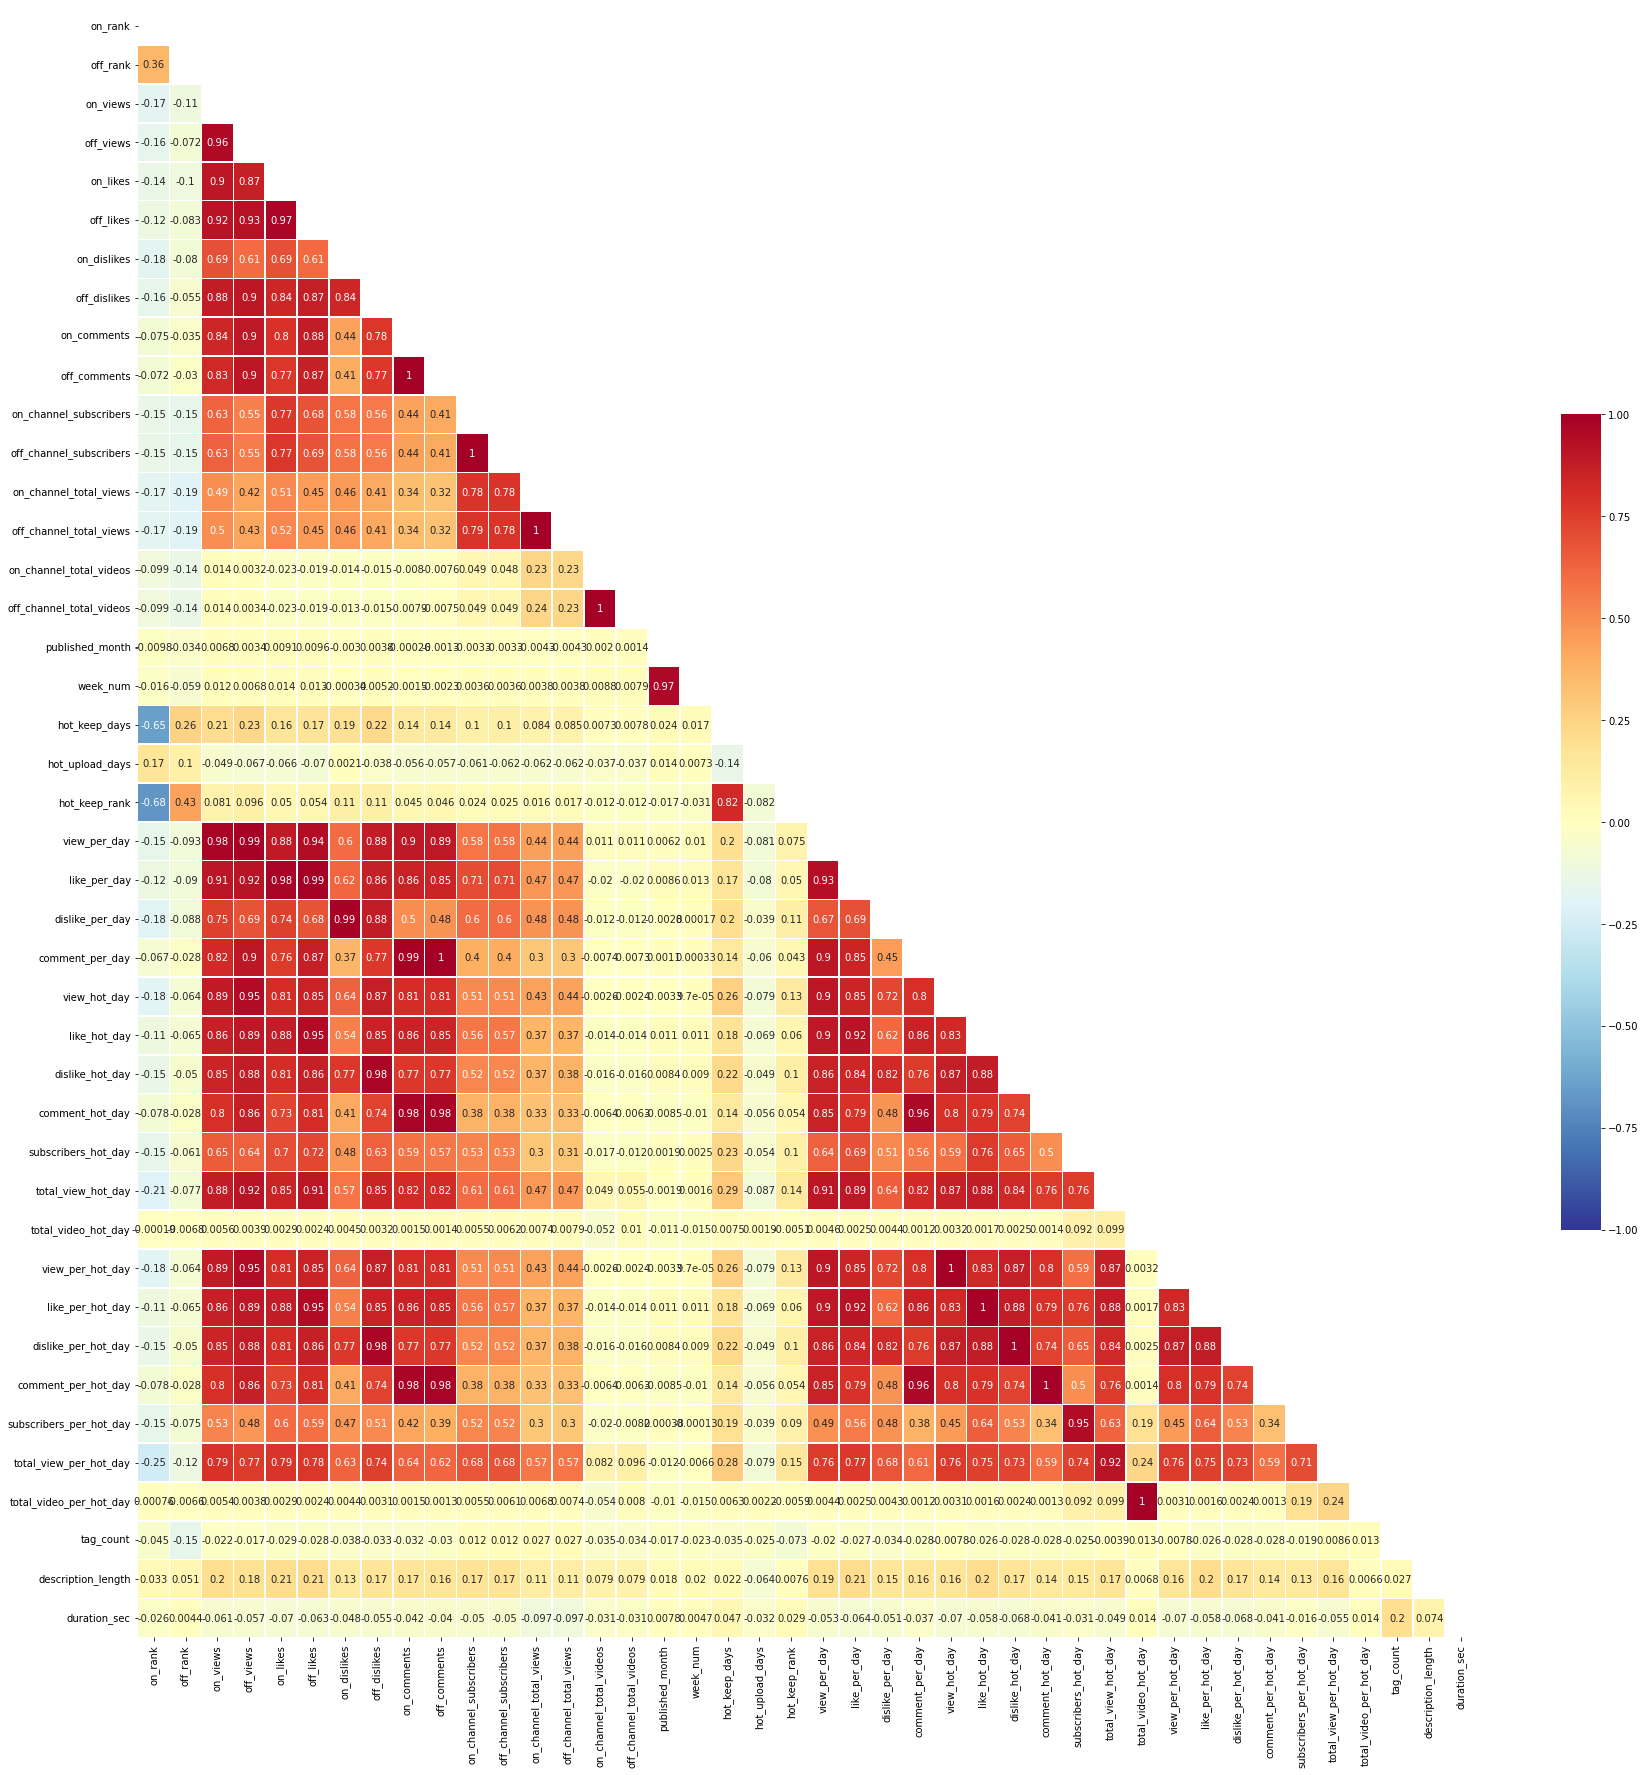

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
# 상관 계수의 평균
# 인기 동영상에 대한 engagement 지표 계산하기 위해 on_view, on_likes, on_dislikes, on_comment에 해당하는 corr의 평균을 계산

corr_df = data.corr()
corr_index_list = corr_df.index.values

view_corr = corr_df["on_views"].tolist()
likes_corr = corr_df["on_likes"].tolist()
dislikes_corr = corr_df["on_dislikes"].tolist()
comment_corr = corr_df["on_comments"].tolist()

avg_corr_list=list()
for idx in range(len(view_corr)):
  avg_corr = round((view_corr[idx]+likes_corr[idx]+dislikes_corr[idx]+comment_corr[idx]) / 4, 2)
  avg_corr_list.append(avg_corr)

avg_corr = pd.DataFrame(avg_corr_list, index = corr_index_list, columns = ['avg_corr'])

In [ ]:
avg_corr[18:]

,avg_corr
hot_keep_days,0.17
hot_upload_days,-0.04
hot_keep_rank,0.07
view_per_day,0.84
like_per_day,0.84
dislike_per_day,0.75
comment_per_day,0.74
view_hot_day,0.78
like_hot_day,0.78
dislike_hot_day,0.80


아랫 부분은 추가 분석으로 사용
(문제가 요구하는 것과는 많이 다름)

In [ ]:
# 채널 별 전체 기간(영상 최초 업로드 ~ 실시간에서 가장 마지막에 내려간 날짜)에 대한 성장 지표(구독자, 전체 시청수, 전체 비디오 수)
chid_list = data["channel_id"].tolist()
uniq_chid = list(set(chid_list))

first_days = list()
first_subscribers = list()
first_total_views = list()
first_total_videos = list()

last_days = list()
last_subscribers = list()
last_total_views = list()
last_total_videos = list()

total_days = list()
growth_subscribers = list()
growth_total_views = list()
growth_total_videos = list()

growth_subscribers_per_day = list()
growth_total_views_per_day = list()
growth_total_videos_per_day = list()

# 채널을 index하는 df 생성
ch_df = pd.DataFrame(uniq_chid, columns = ['channel_id'])

for chid in uniq_chid:
    # 채널 별 df 추출
    filter_chid = (data['channel_id']==chid)
    filtering_df=data.loc[filter_chid, ['published_date', "off_trending_date", 
                                        "on_channel_subscribers", "off_channel_subscribers", 
                                        "on_channel_total_views", "off_channel_total_views",
                                        "on_channel_total_videos", "off_channel_total_videos"]]
  
    # 업로드일 추출 및 최초 업로드일 계산
    published_date_list = filtering_df["published_date"].tolist()
    published_date_list.sort()
    f_y, f_m, f_d = map(int, published_date_list[0].split("-"))
    f_day = datetime.datetime(f_y, f_m, f_d)
    first_days.append(f_day)

    # 채널별 & 최초 업로드일 필터 적용
    filter_f_day = (filtering_df['published_date']==published_date_list[0])
    filtering_f_df = filtering_df.loc[filter_f_day, ['on_channel_subscribers', "on_channel_total_views", "on_channel_total_videos"]]

    # 최초 영상의 업로드를 시점으로한 구독자수, 전체 시청 수, 전체 비디오 수 추출
    f_subscribers = filtering_f_df["on_channel_subscribers"].tolist()
    f_total_views = filtering_f_df["on_channel_total_views"].tolist()
    f_videos = filtering_f_df["on_channel_total_videos"].tolist()

    if len(f_subscribers) == 1:
      first_subscribers.append(f_subscribers[0])
    else:
      first_subscribers.append(sorted(f_subscribers)[0])

    if len(f_total_views) == 1:
      first_total_views.append(f_total_views[0])
    else:
      first_total_views.append(sorted(f_total_views)[0])

    if len(f_videos) == 1:
      first_total_videos.append(f_videos[0])
    else:
      first_total_videos.append(sorted(f_videos)[0])

    # 전체 영상의 마지막 일자 추출
    off_trending_date = filtering_df["off_trending_date"].tolist()
    off_trending_date.sort(reverse=True)
    l_y, l_m, l_d = map(int, off_trending_date[0].split("-"))
    l_day = datetime.datetime(l_y, l_m, l_d)
    last_days.append(l_day)
   
    # 채널별 & 최종 영상 일자 필터 적용
    filter_l_day = (filtering_df['off_trending_date']==off_trending_date[0])
    filtering_l_df = filtering_df.loc[filter_l_day, ['off_channel_subscribers', "off_channel_total_views", "off_channel_total_videos"]]
  
    # 영상 최종 일자 시점으로한 구독자수, 전체 시청 수, 전체 비디오 수 추출
    l_subscribers = filtering_l_df["off_channel_subscribers"].tolist()
    l_total_views = filtering_l_df["off_channel_total_views"].tolist()
    l_videos = filtering_l_df["off_channel_total_videos"].tolist()

    if len(l_subscribers) == 1:
      last_subscribers.append(l_subscribers[0])
    else:
      last_subscribers.append(sorted(l_subscribers, reverse=True)[0])

    if len(l_total_views) == 1:
      last_total_views.append(l_total_views[0])
    else:
      last_total_views.append(sorted(l_total_views, reverse=True)[0])

    if len(l_videos) == 1:
      last_total_videos.append(l_videos[0])
    else:
      last_total_videos.append(sorted(l_videos, reverse=True)[0])
    
    # 전체 기간 측정
    total_day = (l_day-f_day).days+1
    total_days.append(total_day)

    # 하루 단위의 성장 & 성장 평균(일)
    growth_subscribers.append((last_subscribers[-1] - first_subscribers[-1]))
    growth_total_views.append((last_total_views[-1] - first_total_views[-1]))
    growth_total_videos.append((last_total_videos[-1] - first_total_videos[-1]))

    growth_subscribers_per_day.append((last_subscribers[-1] - first_subscribers[-1]) // total_day)
    growth_total_views_per_day.append((last_total_views[-1] - first_total_views[-1]) // total_day)
    growth_total_videos_per_day.append((last_total_videos[-1] - first_total_videos[-1]) // total_day)



ch_df["first_days"]=first_days
ch_df["first_subscribers"]=first_subscribers
ch_df["first_total_views"]=first_total_views
ch_df["first_total_videos"]=first_total_videos

ch_df["last_days"]=last_days
ch_df["last_subscribers"]=last_subscribers
ch_df["last_total_views"]=last_total_views
ch_df["last_total_videos"]=last_total_videos

ch_df["total_days"]=total_days
ch_df["growth_subscribers"]=growth_subscribers
ch_df["growth_total_views"]=growth_total_views
ch_df["growth_total_videos"]=growth_total_videos

ch_df["growth_subscribers_per_day"]=growth_subscribers_per_day
ch_df["growth_total_views_per_day"]=growth_total_views_per_day
ch_df["growth_total_videos_per_day"]=growth_total_videos_per_day

In [ ]:
ch_df

,channel_id,first_days,first_subscribers,first_total_views,first_total_videos,last_days,last_subscribers,last_total_views,last_total_videos,total_days,growth_subscribers,growth_total_views,growth_total_videos,growth_subscribers_per_day,growth_total_views_per_day,growth_total_videos_per_day
0,CH9idb-,2021-06-01,1100000,1054484898,1389,2021-07-30,1140000,1136429364,1475,60,40000,81944466,86,666,1365741,1
1,CHk4XjB,2021-07-16,183000,177069337,1245,2021-07-31,202000,203184314,1335,16,19000,26114977,90,1187,1632186,5
2,CH9G7V6,2021-07-09,466000,92086175,250,2021-07-12,467000,92516572,247,4,1000,430397,-3,250,107599,-1
3,CHAkWpy,2021-04-26,761000,224595137,1193,2021-04-28,761000,224595137,1193,3,0,0,0,0,0,0
4,CHnaGfD,2021-04-15,1340000,239818652,1552,2021-06-12,1370000,247974794,1581,59,30000,8156142,29,508,138239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,CHyuL_X,2021-03-31,347000,61465110,90,2021-04-04,348000,62544946,91,5,1000,1079836,1,200,215967,0
936,CH_U34U,2021-03-29,991000,218866453,425,2021-07-10,1100000,270352769,497,104,109000,51486316,72,1048,495060,0
937,CH0VR2v,2021-04-06,637000,89303050,87,2021-07-26,688000,106525184,97,112,51000,17222134,10,455,153769,0
938,CHkxvX8,2021-07-01,394000,107162164,1422,2021-07-22,403000,109493200,1439,22,9000,2331036,17,409,105956,0


In [ ]:
# 전체기간 & 하루 평균 성장률(구독자수, 전체 시청수, 전체 비디오 수) Top 10
total_growth_result = list()
for preriod in ["", "_per_day"]:
  result_list = list()
  for col in ["growth_subscribers", "growth_total_views", "growth_total_videos"]:
    col_name = col + preriod
    sorted_df = ch_df.sort_values(col_name, ascending=False).reset_index(drop=True)[:10]
    top10_growth_df = sorted_df.loc[list(range(10)), ["channel_id", col_name]]
    top10_growth_df = top10_growth_df.set_index(keys=['channel_id'], inplace=False, drop=True)
    result_list.append(top10_growth_df)
  total_growth_result.append(result_list)

In [ ]:
 multi_table(total_growth_result[0])

,growth_subscribers
channel_id,
CHLkAep,8000000
CH3IZKs,6300000
CHEf_Bc,1500000
CHoe-0E,1372000
CHXURHJ,990000
CHaO6TY,900000
CHDV9zg,880000
CHzCedB,830000
CH3SyT4,830000


In [ ]:
 multi_table(total_growth_result[1])

,growth_subscribers_per_day
channel_id,
CHLkAep,68965
CH3IZKs,58878
CHoe-0E,39200
CHKUz_7,24120
CHF8W68,13550
CH8-Th8,12500
CHEf_Bc,12396
CHaO6TY,12328
CHDV9zg,12222


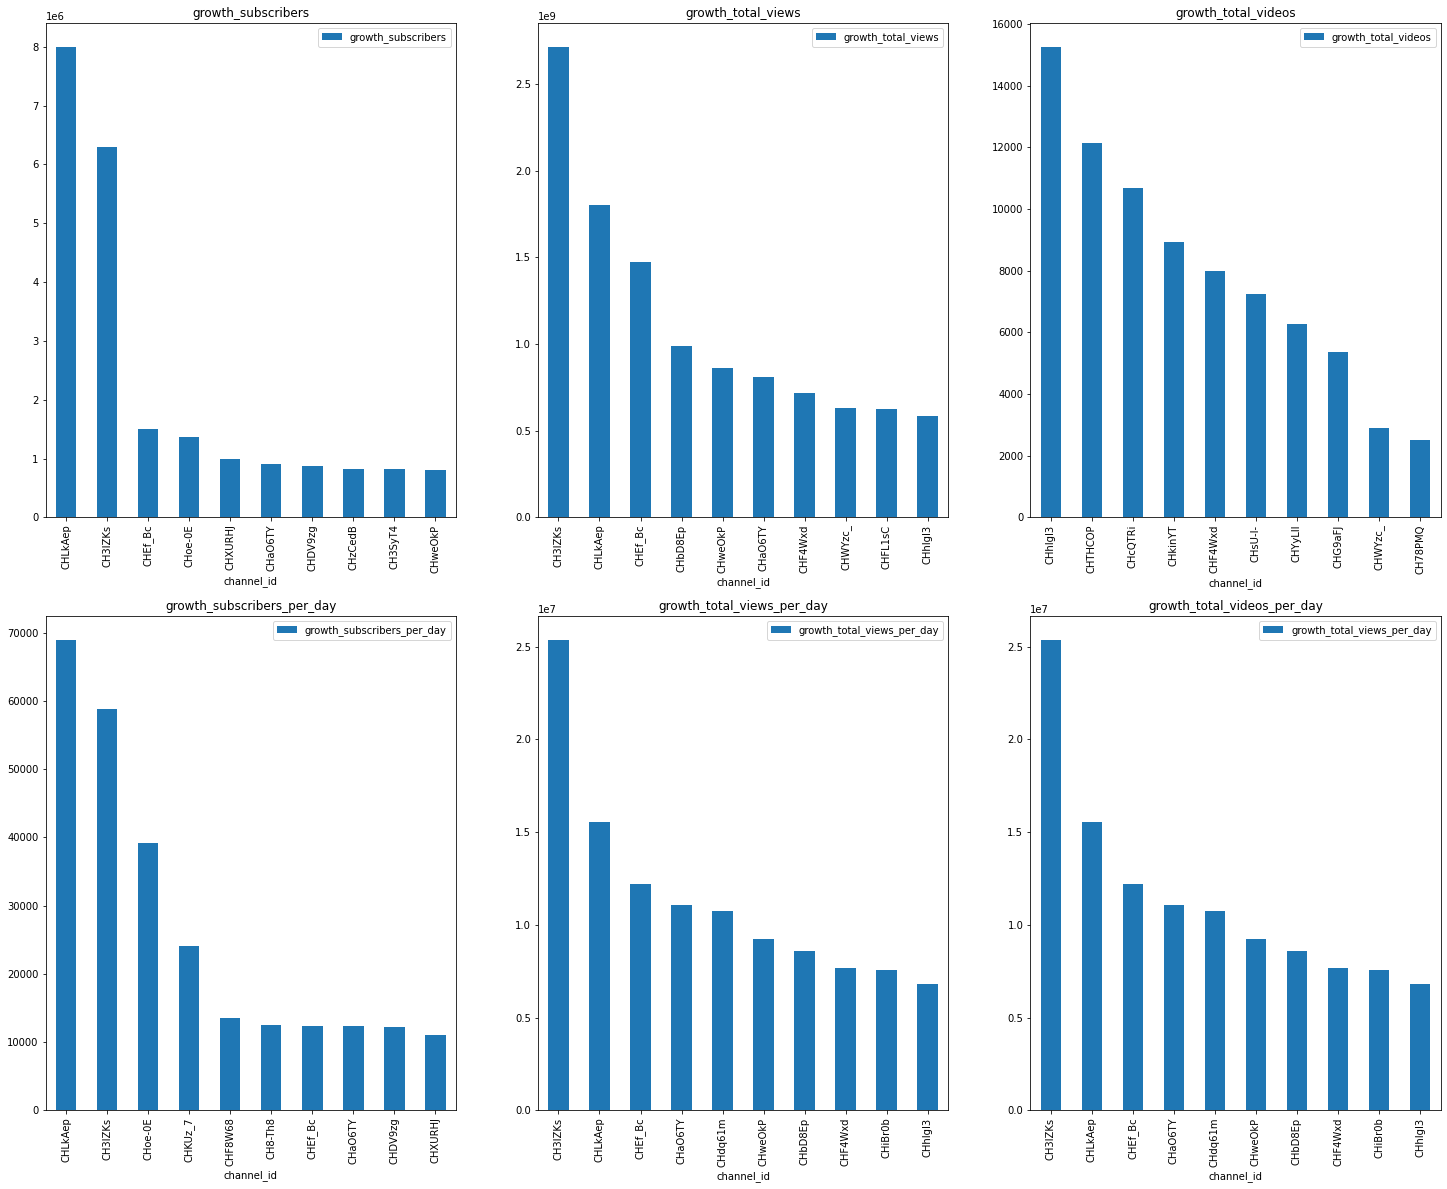

In [ ]:
# 월별 TOP10 채널 (분류 기준은 비디오 개수)
growth_rank_barchart = list()

for preriod in ["", "_per_day"]:
  for col in ["growth_subscribers", "growth_total_views", "growth_total_videos"]:
    col_name = col + preriod
    sorted_df = ch_df.sort_values(col_name, ascending=False).reset_index(drop=True)
    sorted_df.set_index('channel_id', inplace=True)
    growth_rank_barchart.append(sorted_df.loc[sorted_df.index.values.tolist()[:10], [col_name]])

fig, axes = plt.subplots(figsize=(25,20),nrows=2, ncols=3)

growth_rank_barchart[0].plot(ax=axes[0,0], kind='bar', title='growth_subscribers')
growth_rank_barchart[1].plot(ax=axes[0,1], kind='bar', title='growth_total_views')
growth_rank_barchart[2].plot(ax=axes[0,2], kind='bar', title='growth_total_videos')
growth_rank_barchart[3].plot(ax=axes[1,0], kind='bar', title='growth_subscribers_per_day')
growth_rank_barchart[4].plot(ax=axes[1,1], kind='bar', title='growth_total_views_per_day')
growth_rank_barchart[4].plot(ax=axes[1,2], kind='bar', title='growth_total_videos_per_day')